# Assignment 9: Multiple regression

### Learning Outcomes
This assignment introduces you to multiple regression analysis, model comparision between different multiple regression models and bootstrap for regression models. 
### Data set 
An investigator is interested in understanding the relationship, if any, between the analytical skills of young gifted children and the following variables: father’s IQ, mother’s IQ, age in month when the child first said ‘mummy’ or ‘daddy’, age in month when the child first counted to 10 successfully, average number of hours per week the child’s mother or father reads to the child, average number of hours per week the child watched an educational program on TV during the past three months, average number of hours per week the child watched cartoons on TV during the past three months. 

The analytical skills are evaluated using a standard testing procedure, and the score on this test is used as the response variable. Data were collected from schools in a large city on a set of thirty-six children who were identified as gifted children soon after they reached the age of four.
 
The data frame stored in gifted.csv contains the variables: 
- score:       Score in test of analytical skills.
- fatheriq:    Father’s IQ.
- motheriq:  Mother’s IQ.
- speak:       Age in months when the child first said ‘mummy’ or ‘daddy’.
- count:       Age in months when the child first counted to 10 successfully.
- read:         Average number of hours per week the child’s mother or father reads to the child.
- edutv:       Average number of hours per week the child watched an educational program on TV during the past three months.
- cartoons:  Average number of hours per week the child watched cartoons on TV during the past three months.

### Preliminaries
Set up the environment by importing pandas, numpy, and matplotlib, scipy.optimize. This is already done in the preliminaries. Ensure that you have fully mastered and understood HW7 before starting the assignment. 


In [2]:
import matplotlib.pyplot as plt 
import scipy.optimize as so
import pandas as pd 
import numpy as np

## Task 1: Implementing multiple regression ( / 28 pts)
### Question 1.1 ( / 6 pts)
Implement the function multRegPredict(b,D,xname). 
  - b is a list of parameter, with the first one being the intercept 
  - D is a DataFrame that contains the regressors
  - xname is a list of column names in D that will be added as regressors 

b needs to contain one more parameter (the intercept) than the numbers of regressors in xname. It will be helpful to start from the corresponding functions from last homework for polynomial regression. 

Then make a scatterplot of D.read and D.score 
Call your new function with yp = multRegPredict([134,11.8], D,['read']) and add predicted values to your plot (just call plt.scatter again – the dots will be added in a different color).  

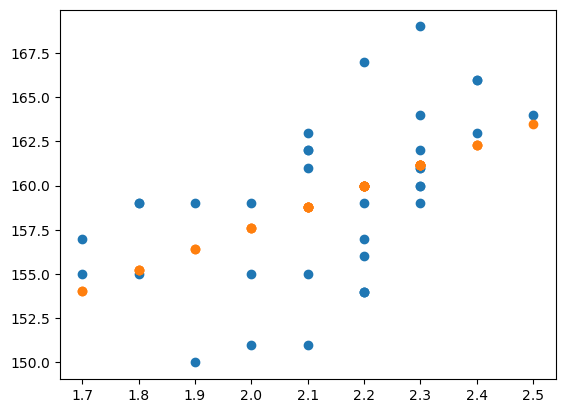

In [3]:
# load in data set
df = pd.read_csv("gifted.csv")
df

# multiple regression model
def multRegPredict(b, D, xname):
    # initialize predicted y to be the intercept
    yp = np.ones(len(D.index))*b[0]
    
    for i in np.arange(len(xname)):
        yp = yp + D[xname[i]]*b[i+1]
    
    return yp

# scatterplot of D.read and D.score
plt.scatter(df.read, df.score)

# call function
yp = multRegPredict(b = [134, 11.8], D = df, xname = ["read"])

# plot predicted values
plt.scatter(df.read, yp)
plt.show()


Figure 1. Scatter plot of observed and predicted values for read vs. score.

### Question 1.2 ( / 10 pts)
Implement the function multRegLossRSS(b,D,y,xname). y is a list or np-array for the response variable. The function should get the predictions from multRegPredict, and then calculate the residual sum-of-squares, and the derivative of the loss function in respect to each parameter. Test the function by calling multRegLossRSS([134,11.8],D,D.score,['read']). Report the resulting RSS for the regression of score (response variable) against read (explanatory variable)- as well as the derivatives for each parameter. Written answer: From the value of the derivative, do you have to increase or decrease the slope parameter to get a better fit?

In [4]:
def multRegLossRSS(b, D, y, xname):
    # get predicted y-values 
    yp = multRegPredict(b, D, xname)
    
    # calculate RSS
    res = y - yp
    res2 = res**2
    RSS = sum(res2)

    # initialize derivative array !!! 3?? what is this supposed to be
    deriv = np.zeros(len(b))

    # derivative in respect to intercept
    deriv[0] = -2*sum(res)

    # derivative in respect to the ith explanatory variable
    for i in range(len(xname)):
        xi = D[xname[i]]
        deriv[i + 1] = -2*np.sum(xi*res)
    
    return (RSS, deriv)

# call function
multRegLossRSS(b = [134,11.8], D = df, y = df.score, xname = ['read'])

(543.5100000000003, array([ 4.84, 10.3 ]))

The slope parameter should be decreased to get a better fit.

### Question 1.3 ( / 12 pts)
Implement the function multRegFit(D,y,xname), which uses so.minimize and multRegLossRSS to estimate the parameter values, and then calls multRegLossRSS again to calculate the R2 of the fit. The function should then return the R2 values and regression coefficients b. Use this print on the screen the R2-values for the models:

- y = b0  (hint, set xname = [])
- y = b0 + b1 \* read 
- y = b0 + b1 \* motheriq 
- y = b0 + b1 \* motheriq + b2 \* read

Which model has the highest R2? How do you interpret these results? How much of the variance of the response variable is uniquely explained by reading, how much by motheriq? Do the two variables explain each other away, explain independent parts of the variance, or show suppression? 

In [5]:
def multRegFit(D, y, xname = []):
    # N = number of parameters
    N = len(xname)      
    b0 = np.zeros(N + 1)

    # estimate parameter values
    RESULT = so.minimize(multRegLossRSS, b0, args = (D, y, xname), jac = True)
    b = RESULT.x    # Results
    # print(b)
    
    # calculate RSS
    RSS, deriv = multRegLossRSS(b, D, y, xname)

    # calculate TSS
    res = y - np.mean(y)
    TSS = sum(res**2)

    # calculate R2
    R2 = 1 - RSS/TSS

    return (R2, b)

# dimension of b0 not right

In [6]:
# y = b0  (hint, set xname = [])
multRegFit(D = df, y = df.score, xname = [])

(3.3306690738754696e-16, array([159.13888889]))

In [7]:
# y = b0 + b1 * read
multRegFit(D = df, y = df.score, xname = ["read"])

(0.2758322729769085, array([133.9048511 ,  11.81307361]))

In [8]:
# y = b0 + b1 * motheriq
multRegFit(D = df, y = df.score, xname = ["motheriq"])

(0.3263173772377881, array([111.09295521,   0.40659464]))

In [9]:
# y = b0 + b1 * motheriq + b2 * read
multRegFit(D = df, y = df.score, xname = ["motheriq", "read"])

(0.6291342380411358, array([82.63542504,  0.42346452, 12.38890287]))

The final model with motheriq and read has the highest R2. More of the variance of the response variable is explained by motheriq than read. However, the joined predicted variance is about equal to the sum of the individual predicted values, which implies that these two variables explain independent parts of the variance and may not be strongly correlated (are independent predictors).

## Task 2: Do crossvalidation on these models  ( / 32 pts)
### Question 2.1 ( / 12 pts)
Modify the leaveOneOutCV function from last homework, so it works on a data frame with the multiple regression analysis. The inputs to the function are:  

def leaveOneOutCV(D,y,args=(),fitfcn=multRegFit,predictfcn=multRegPredict):
 - D: Data Frame with explanatory variables 
 - y: A list or np-array of the response variable
 - args: Input arguments for the fitfcn and predict function (xname) 
 - fitfcn: Function for fitting called as fitfcn(D,y,args)
 - predictfcn: Function for prediction called as predictfcn(D,y,args)


In [10]:
def leaveOneOutCV(D, y, args = (), fitfcn = multRegFit, predictfcn = multRegPredict):
    N = len(D.index)
    yp = np.zeros(N)
    ind = np.arange(N)

    for i in range(N):
        train = ind != i   # this is training set
        test = ind == i    # this is test set
        r, b = fitfcn(D[train], y[train], args)
        yp[i] = predictfcn(b, D[test], args)  
    
    # calculate R-squared after cross validation
    TSS  = sum((y - y.mean())**2)
    RSScv = sum((y - yp)**2)
    R2cv = 1 - RSScv/TSS

    return R2cv

R2cv = leaveOneOutCV(D = df, y = df.score, args = ["motheriq", "read"])

### Question 2.2 ( / 8 pts)
Call the function to get the cross-validated $R^2$ for the 4 models specified in Task 1, Question 3. How to you interpret these results? Is there evidence that reading increases the analytic score over and above what the IQ of the mother does? 

In [11]:
leaveOneOutCV(D = df, y = df.score, args = [])

-0.05795918367345809

In [12]:
leaveOneOutCV(D = df, y = df.score, args = ["read"])

0.2041976646172461

In [13]:
leaveOneOutCV(D = df, y = df.score, args = ["motheriq"])

0.236467819730799

In [14]:
leaveOneOutCV(D = df, y = df.score, args = ["motheriq", "read"])

0.5760093389164505

R-squared values from read and motheriq individually then summed together is lower than the R-squared value we get from considering both variables (0.576). Reading increases the score over and above what motheriq does. This means that the model fits better when considering both variables than considering each individually, and that read and motheriq are correlated regressors.

### Question 2.3 ( / 4 pts)
Add the variable fatheriq to the model containing read and motheriq. Is there evidence that the IQ of the father improves the prediction over and above what hours reading and mother IQ can predict? 

In [15]:
leaveOneOutCV(D = df, y = df.score, args = ["motheriq", "read", "fatheriq"])

0.6326907019137389

In [16]:
leaveOneOutCV(D = df, y = df.score, args = ["fatheriq"])

-0.06615530607380293

fatheriq does improve the prediction over just the prediction suggested by motheriq and read.

### Question 2.4 ( / 8 pts)
Is edutv (hours of educational TV) alone a reliable predictor of the analytic score? Does it add prediction power over and above from what the model motheriq + read + fatheriq can predict? 


In [17]:
leaveOneOutCV(D = df, y = df.score, args = ["edutv"])

0.037315563547507424

In [18]:
leaveOneOutCV(D = df, y = df.score, args = ["motheriq", "read", "fatheriq", "edutv"])

0.6209659528061651

Edutv alone is not a reliable predictor of score. It does not add prediction power when considered with motheriq, read, and fatheriq. The R2 value actually decreases slightly so the fit decreases when includingi edutv.

## Task 3: Bootstrap for multiple regression. ( / 40 pts)
### Question 3.1 ( / 14 pts)
Implement bootstrap for linear regression. Start from the function bootstrap from Homework 3. The function should have input parameters

```
def bootstrapReg(D,y,args,fitfcn,numIter=500):
```
and should return a numIter x numParams np.array of bootstrap estimates.  

fitfcn is the function that will be used to get the parameter estimates.
numParams is the length of b-vector returned from the fitfcn (in our case multiRegFit). That is, each column of the array should be the boostrap estimates for one of the regression coefficients. 

Note: you will also have to use here the following functions (add them to your notebook): 
- confidenceInt from HW 3

Run the bootstrap on the data set in gifted.csv. Run the bootstrap on a simple regression model that explains ‘score’ from the explanatory variable ‘edutv’ alone. Report the CI for edutv -slope. Does the CI include zero - i.e. is there evidence that the relationship between edutv and score is not zero? Which direction is the association between the two variables? 

In [21]:
# confidence interval function
def confidenceInt(data, percentage):    
    # percentile bootstrap method
    tail = (100 - percentage)/2
    CI = (np.percentile(data, tail), np.percentile(data, percentage))
    
    return CI

def bootstrapReg(D, y, args = (), fitfcn = multRegFit, numIter = 500):
    # figure out length of b (numParam)
    R2, b = fitfcn(D, y, args)
    numParam = len(b)

    # N is number of rows in df
    N = len(df.index)
    ind = np.arange(N)

    # initialize stats
    stats = np.zeros((numIter, numParam))   # needs to call multregfit
    
    for i in range(numIter):
        # sample N indices from ind (with replacement)
        sample = np.random.choice(ind, N)

        # fit model for current iteration and get params for current iteration
        R2, b = fitfcn(D.iloc[sample], y[sample], args)  
        stats[i, :] = b
   
    return stats

In [53]:
vals = bootstrapReg(D = df, y = df.score, args = ["edutv"])
confidenceInt(data = vals, percentage = 0.95)

(0.47563446418148975, -5.220822697699516)

The confidence interval for edutv slope is (0.48, -5.22), which does include zero, so edutv has no positive influence. The variables have a slight negative association.

### Question 3.2 ( / 8 pts)
Run the bootstrap on the model that explains score as a function of hours of cartoons watched. Does the confidence interval for the slope between ‘cartoons’ and ‘score’ include zero? 

In [56]:
vals = bootstrapReg(D = df, y = df.score, args = ["cartoons"])
confidenceInt(data = vals, percentage = 0.95)

(4.599070737685119, -0.5307578626694103)

The confidence interval = (4.60, -0.53) which does include zero.

### Question 3.3 ( / 8 pts)
Run the bootstrap on a model that explains score as a function of edutv and cartoons. Report the CIs for both variabless. Do the conclusion from Question 1 and 2 change? Have the CIs become smaller or larger as compared to the simple regression models from Question 1 and 2?

In [59]:
values = bootstrapReg(D = df, y = df.score, args = ["edutv", "cartoons"])

# CI for slope of edutv
confidenceInt(data = values[:, 1], percentage = 0.95)

(-8.147786083864148, -15.673565556710267)

In [61]:
# CI for slope of cartoons
confidenceInt(data = values[:, 2], percentage = 0.95)

(-4.862608702467865, -12.03063050163102)

Both variables now do not include zero, implying there is an influence. The confidence intervals are slightly larger compared to the simple regression models.

### Question 3.4 ( / 10 pts)
Plot the bootstrap estimates for edutv and cartoons from Question 3 against each other in a scatter plot. Are they positively or negatively related? What does this mean for the relationship between the regressors?

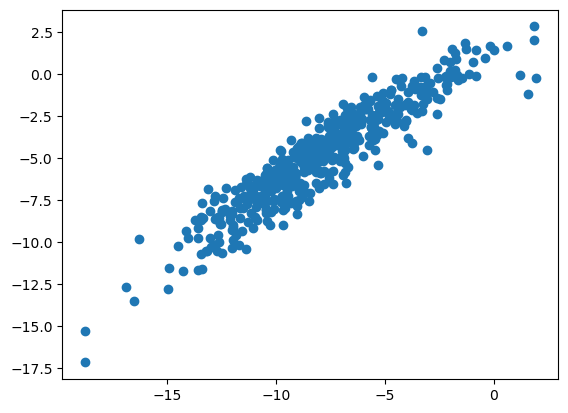

In [49]:
# call bootstrap
values = bootstrapReg(D = df, y = df.score, args = ["edutv", "cartoons"])

# get second and third column
edutv_boot = vals[:, 1]
cartoons_boot = vals[:, 2]

# plot scatter plot
plt.scatter(edutv_boot, cartoons_boot)
plt.show()

Slope estimates for edutv and cartoons appears to be positively related. This means that the regressors are negatively correlated.